## Aufgabe 5

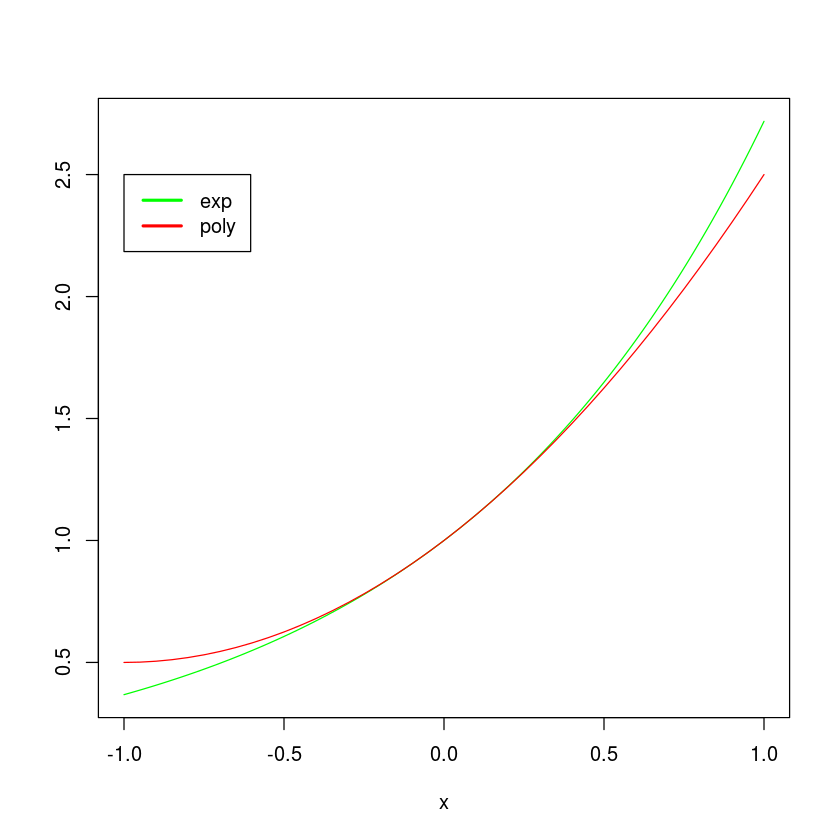

In [26]:
x<-seq(-1, 1, 0.05)
g<-function(x) {0.5*x*x+x+1}
plot(exp, from=-1, to=1, col="green", ylab="")
lines(x, g(x), col="red")
legend(-1, 2.5, c("exp","poly"), lty=c(1,1), lwd=c(2.5,2.5),col=c("green","red"))

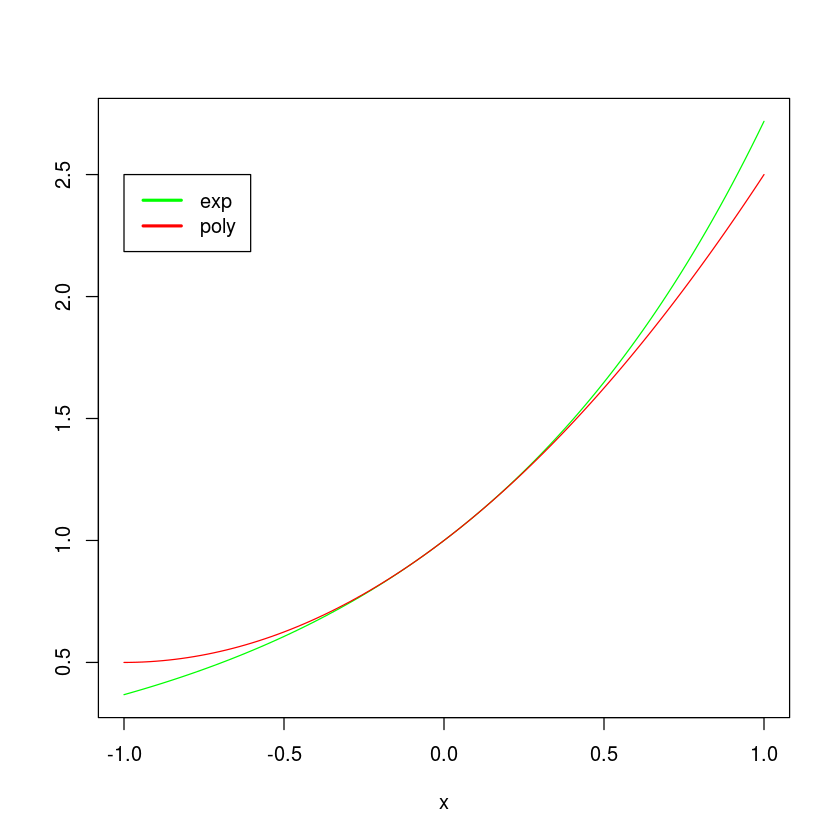

In [30]:
curve(exp, from=-1, to=1, col="green", ylab="")
curve(g, from=-1, to=1, col="red", add=TRUE)
legend(-1, 2.5, c("exp","poly"), lty=c(1,1), lwd=c(2.5,2.5),col=c("green","red"))

## Aufgabe 6

In [56]:
library(MASS)
data(hills)

my.plot_individual<-function(data, name) {
    hist(data, col="blue", main=paste("Histogram of", name))
    dense = density(data)
    plot(dense, main=paste("Density of", name))
    polygon(dense, col="blue", border="black") 
}

my.plot_all<-function(d1, d2, n1, n2) {
    
    my.plot_individual(d1, n1)
    my.plot_individual(d2, n2)
    boxplot(d2~d1, main=paste("Box", n1, n2), xlab=n1, ylab=n2) 
    qqplot(d1, d2, main=paste("QQplot", n1, n2), xlab=n1, ylab=n2)
}


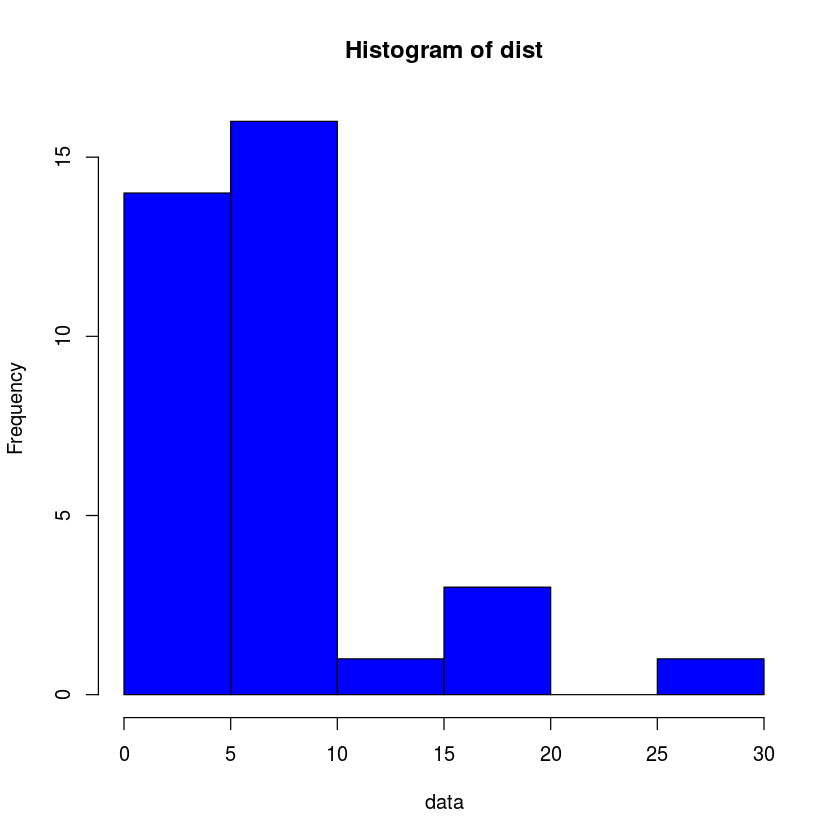

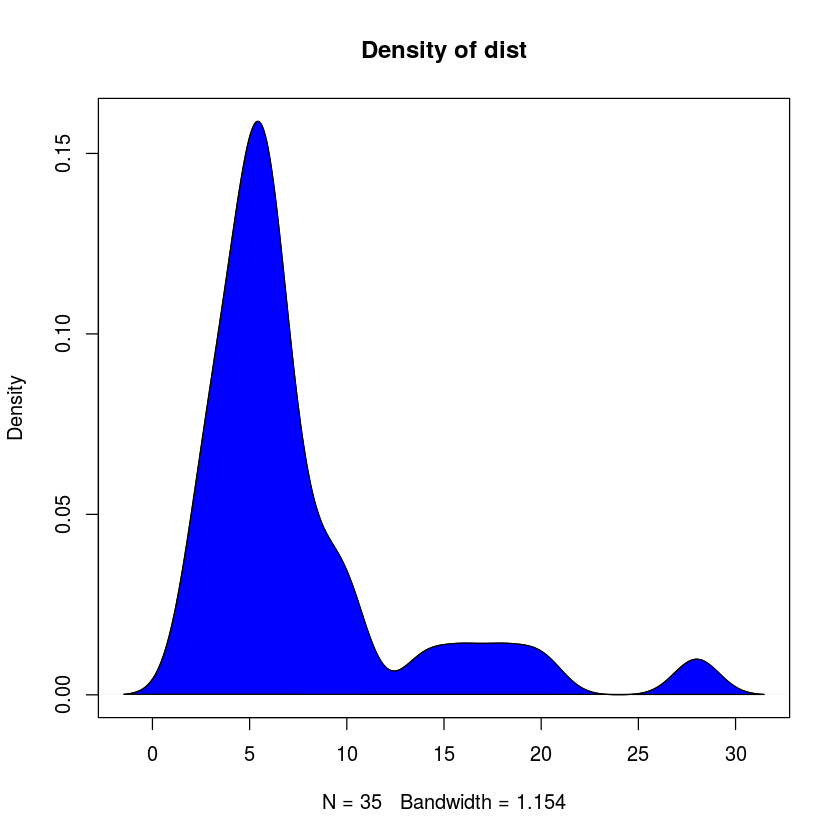

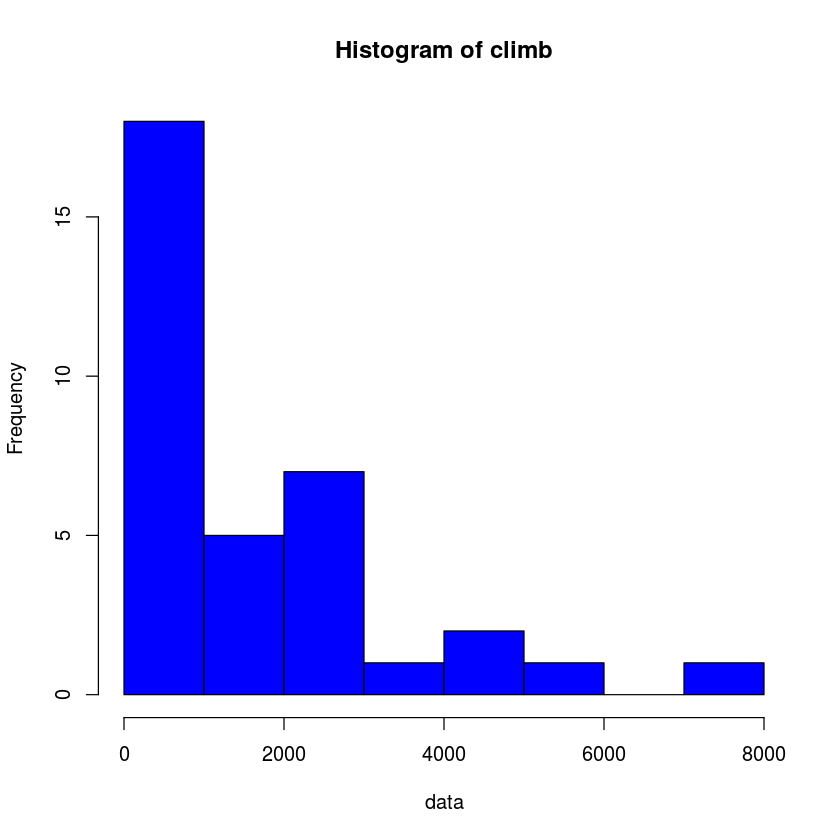

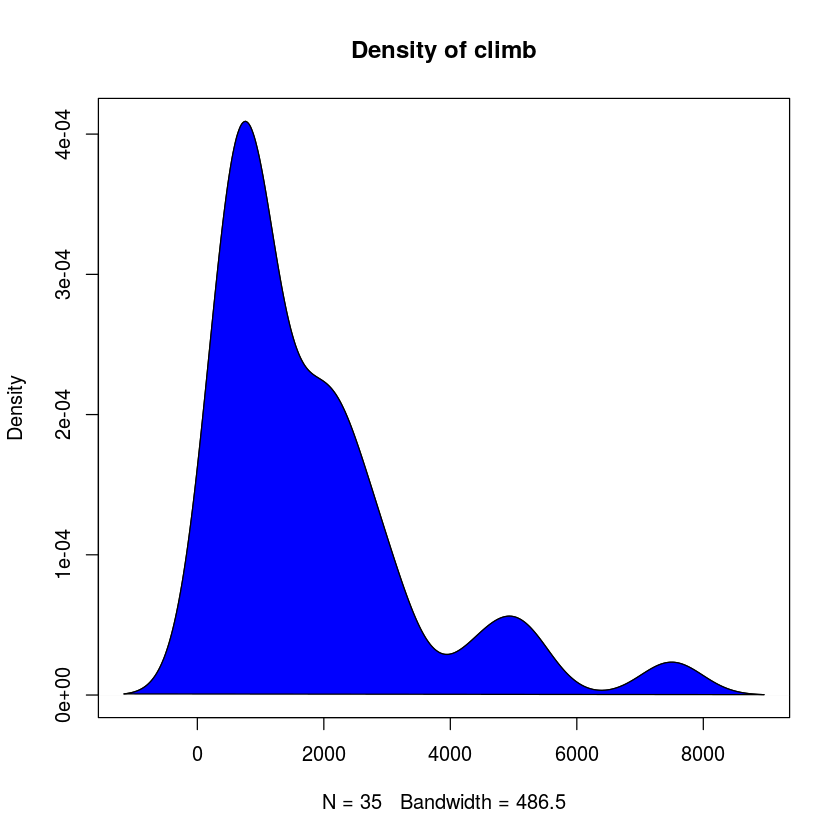

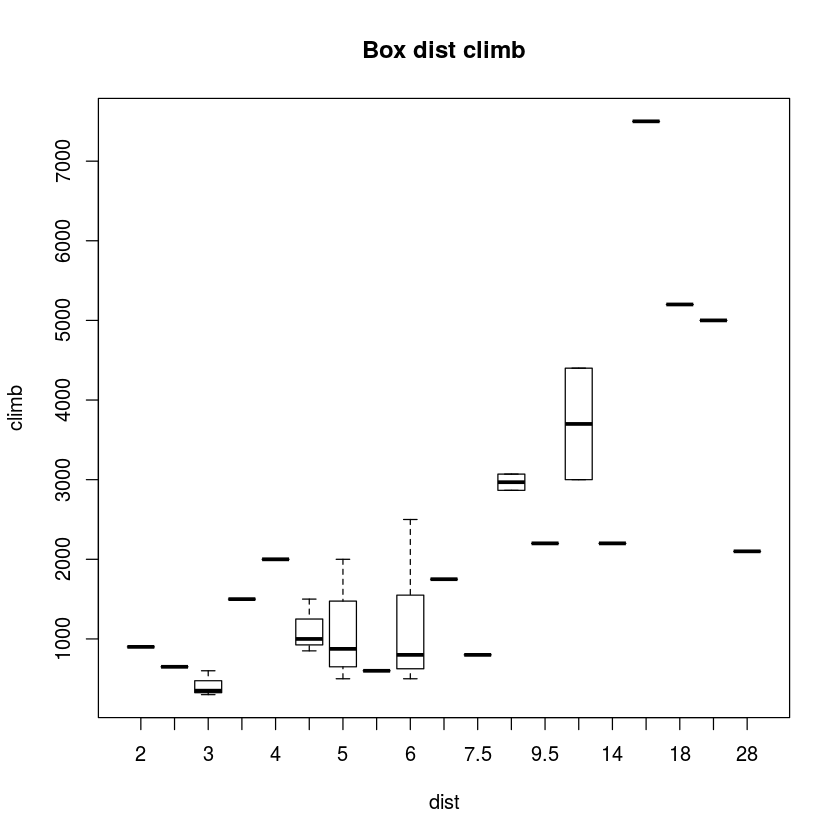

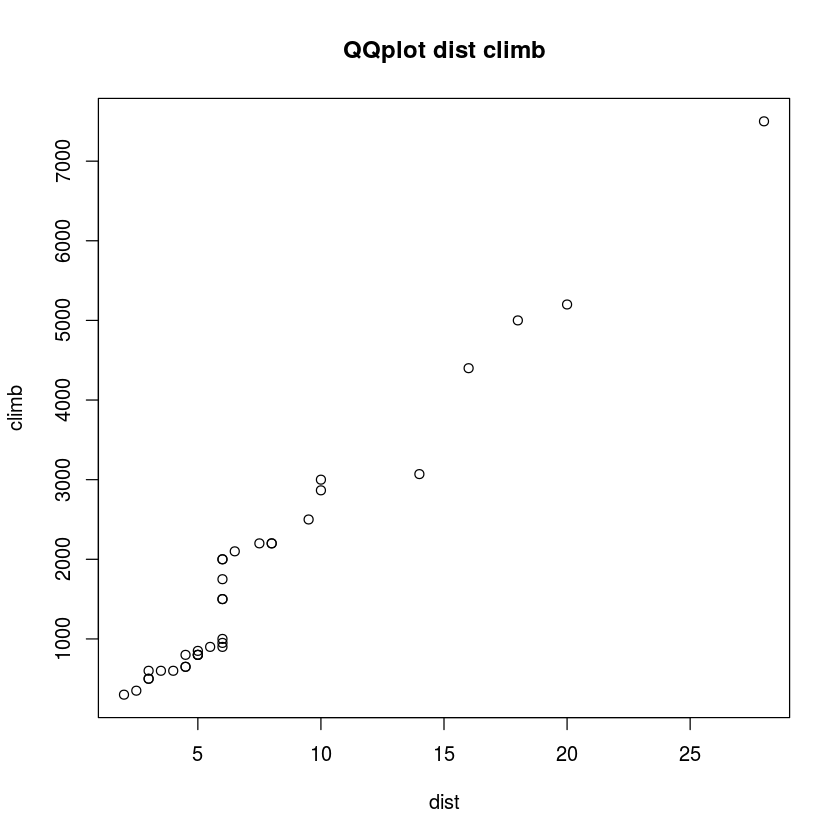

In [60]:
my.plot_all(hills$dist, hills$climb, "dist", "climb")

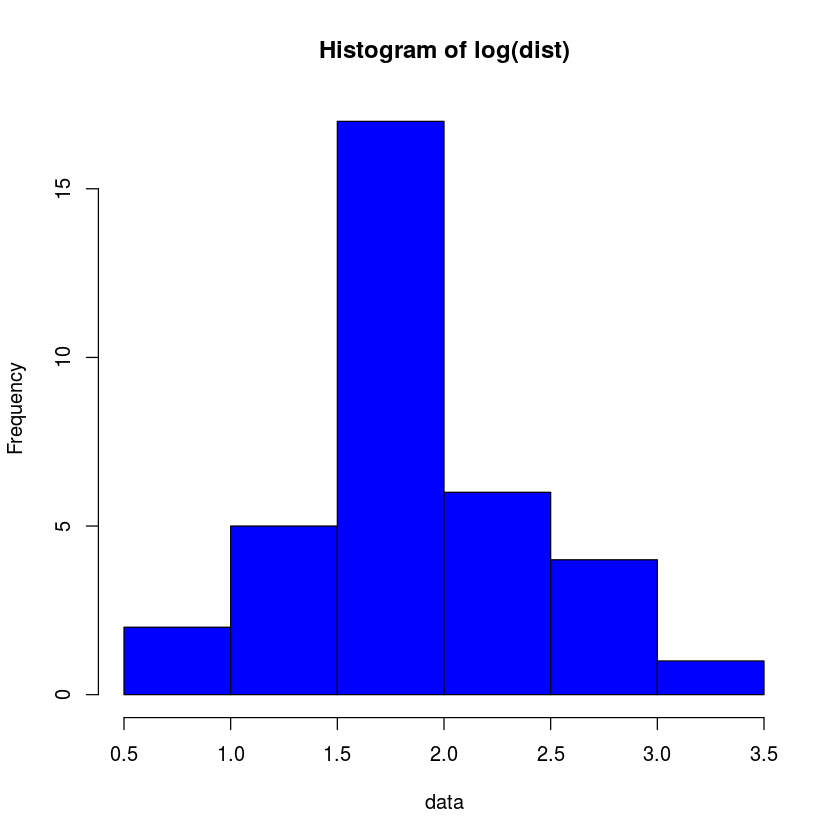

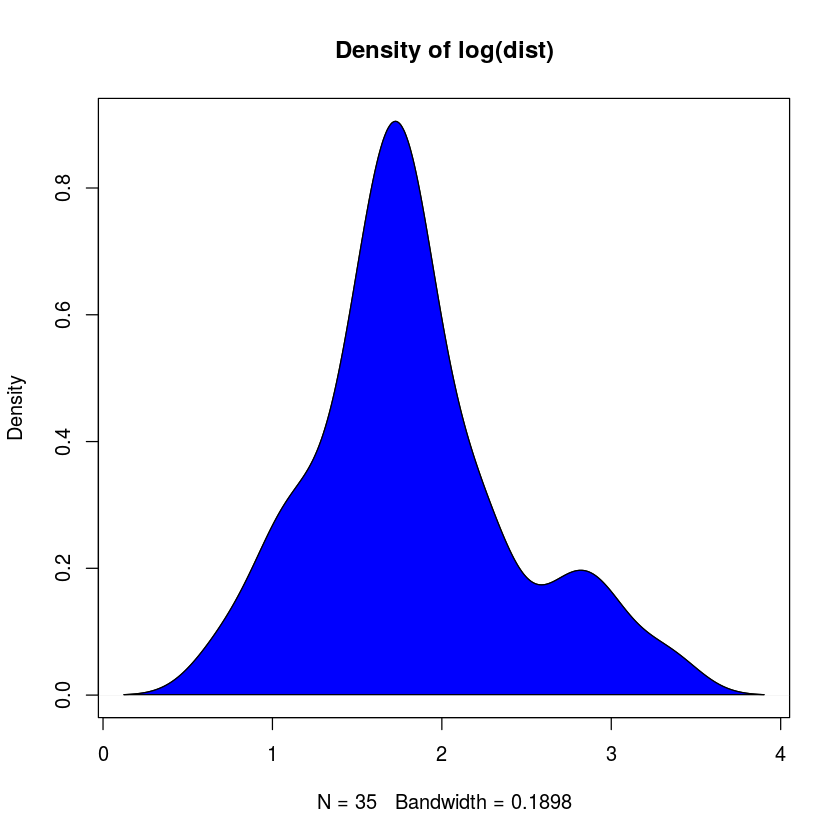

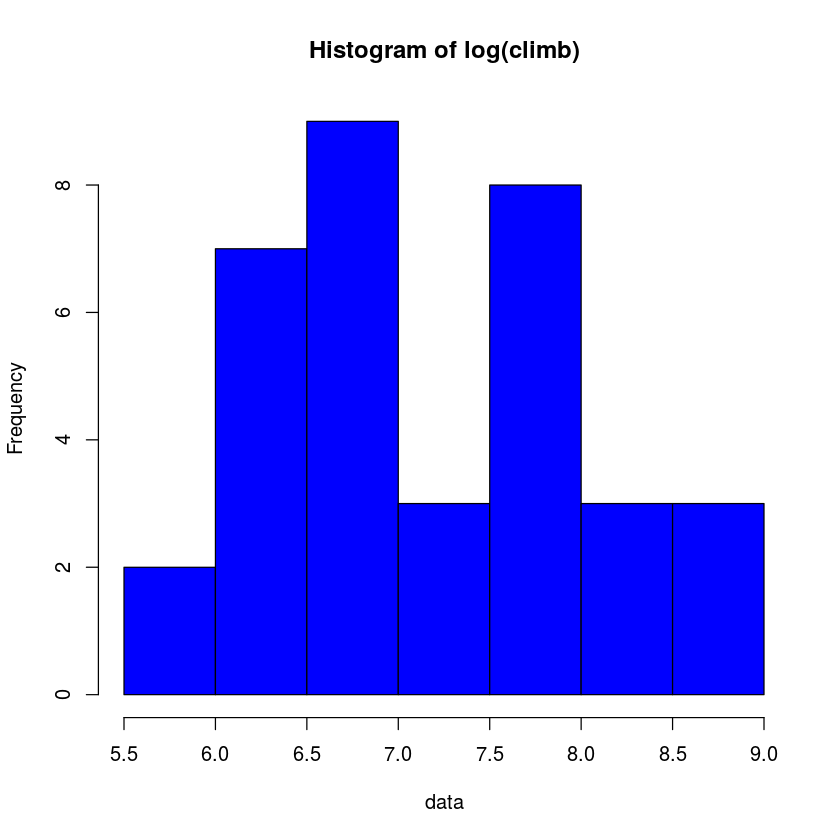

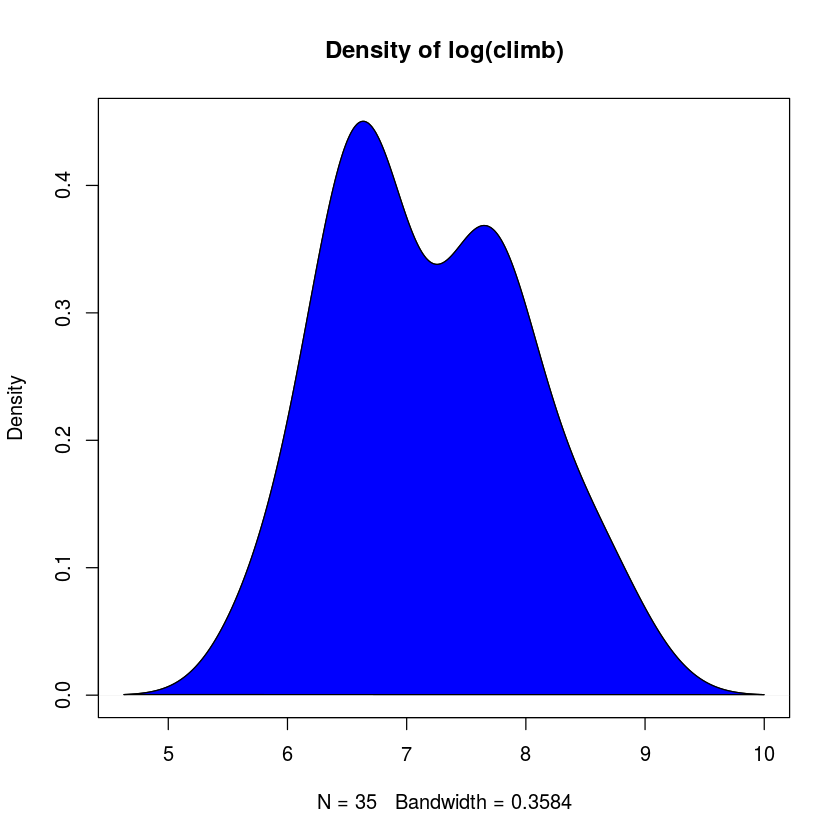

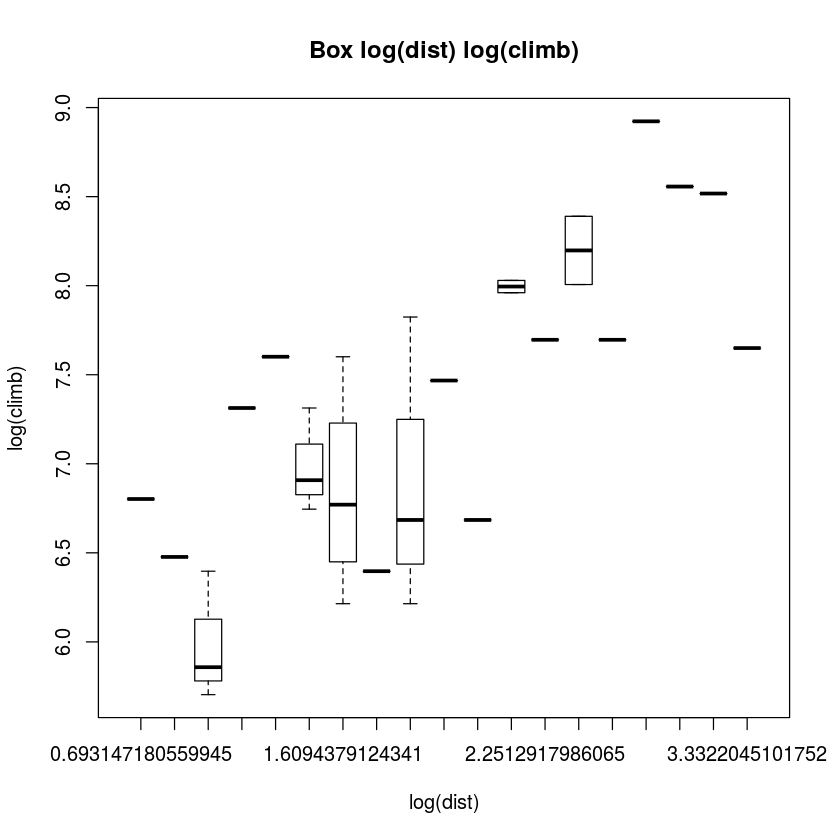

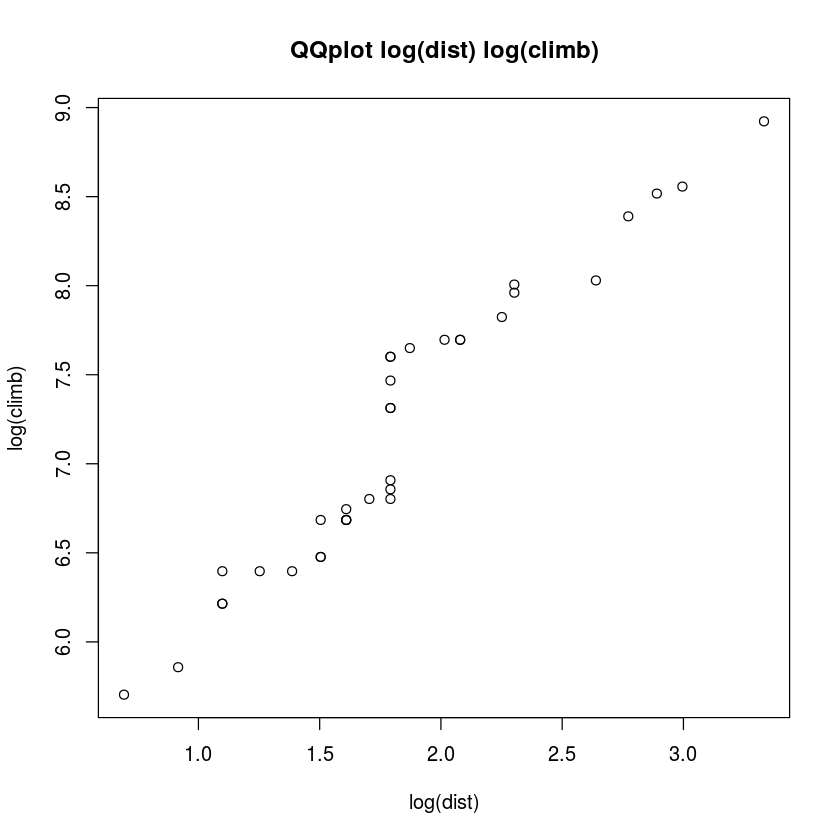

In [59]:
my.plot_all(log(hills$dist), log(hills$climb), "log(dist)", "log(climb)")


## Aufgabe 7

[1] 0.6826895 0.9544997 0.9973002 0.9999367 0.9999994

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

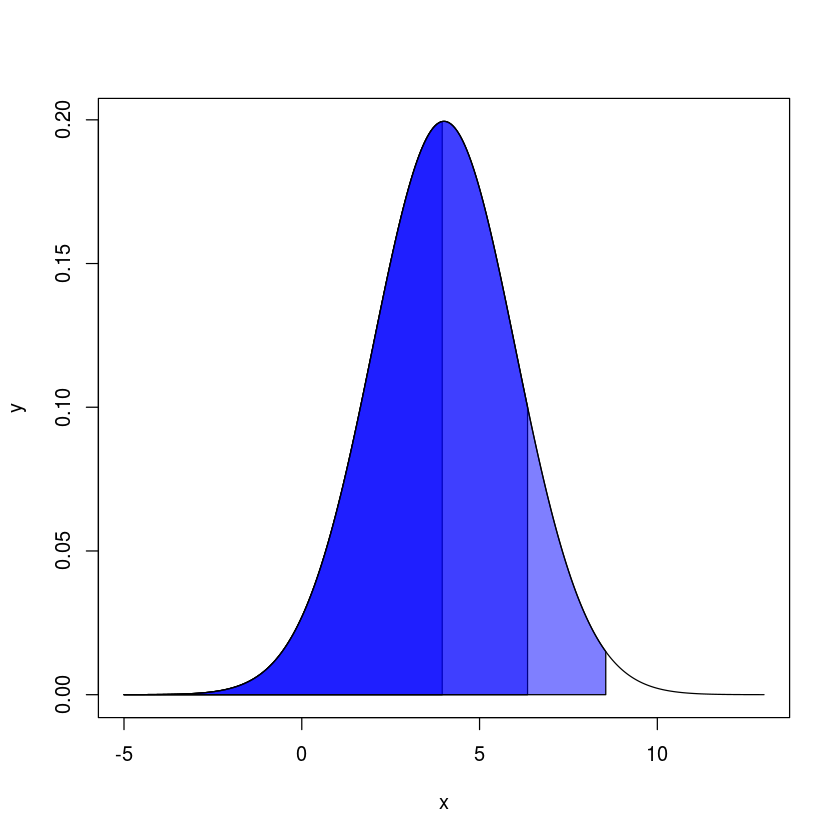

In [96]:
p_k<-function(k, mu, sigma) {
    upper = pnorm(mu + k * sigma, mu, sigma)
    lower = pnorm(mu - k * sigma, mu, sigma)
    upper - lower
}

sapply(X=1:5, FUN=p_k, mu=3, sigma=2)

x=seq(-5, 13, 0.05)
y=dnorm(x, 4, 2)
plot(x, y, type="l")

probs = sapply(X=1:3, FUN=p_k, mu=3, sigma=2)
qs = qnorm(probs, 3, 2)

# Draw the area under the distribution
draw_area<-function(q, x, y, col) {
    x1 = min(which(x>= -5))
    x2 = max(which(x <  q))
    polygon(x=c( x[c(x1,x1: x2,x2)]), y= c(0, y[x1:x2], 0), col=col)
}

sapply(X=qs, FUN=draw_area, x=x, y=y, col=rgb(0,0,1,0.5))


## Aufgabe 8

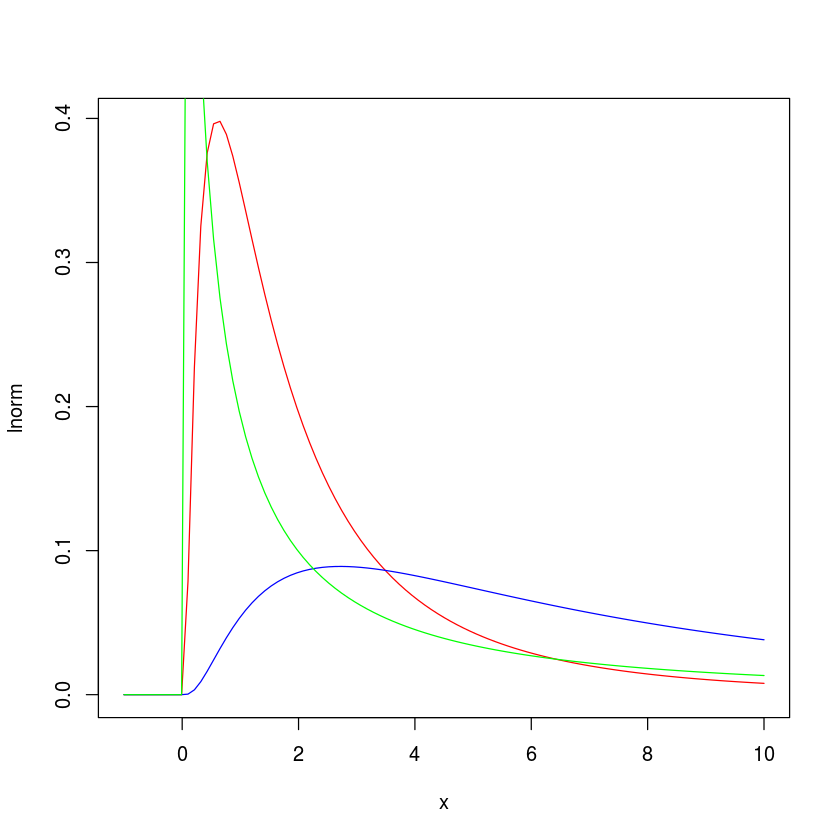

In [10]:
curve(dlnorm(x, 0.5, 1), from=-1, to=10, col="red", ylab="lnorm")
curve(dlnorm(x, 2, 1), add=TRUE, from=-1, to=10, col="blue")
curve(dlnorm(x, 0.5, 2), add=TRUE, from=-1, to=10, col="green")

## Aufgabe Z1

In [30]:
simulate = function(n_samples, mu=0, sd=1) {
    sample = rnorm(n_samples, mu, sd)
    quartiles = quantile(sample, c(0.25, 0.75))
    iqr_max = 1.5 * IQR(sample)
    upper = length(sample[sample > quartiles[2] + iqr_max])
    lower = length(sample[sample < quartiles[1] - iqr_max])
    (upper + lower) / n_samples
}

simulate(100000, 0, 1)
simulate(100000, 2, 0.2)

[1] 0.00675

[1] 0.00666

## Aufgabe Z2

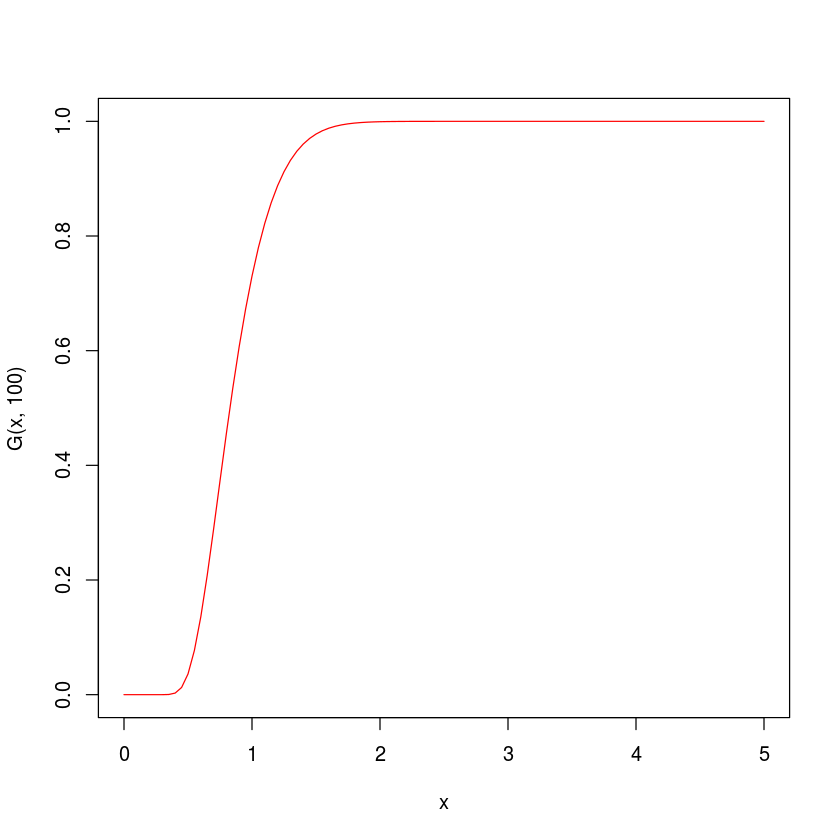

In [73]:
G = function(x, limit) {
    ops = 1:limit
    one_iter = function(x, z) {
        (-1)^(x+1)*exp(-2*x^2*z^2)
    }
    sum_elements = sapply(ops, one_iter, z=x)
    results = 1 - 2 * rowSums(sum_elements)
    results[x <= 0] = 0
    return(results)
}

x <- seq(0, 5, 0.05)
plot(x, G(x, 100), type="l", col="red")


## Aufgabe Z3

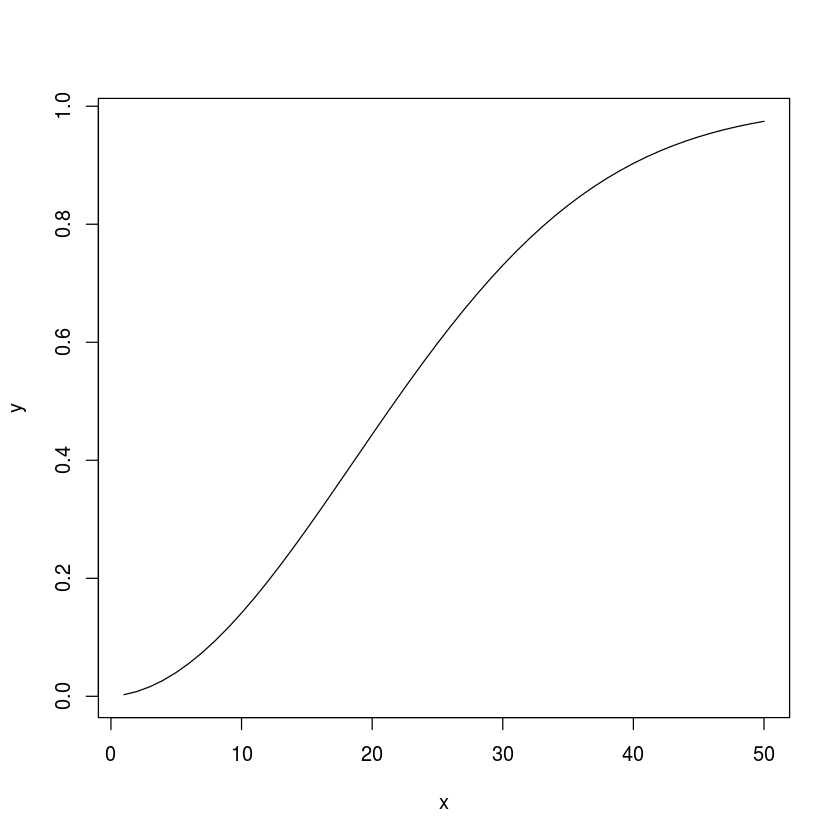

In [91]:
p_k = function(k_max) {
    one_val = function(x) {1 - x / 365}
    ops = 1:k_max
    product = prod(sapply(ops, one_val))
    1 - product
}

x = seq(1, 50, 1)
y = sapply(x, p_k)
plot(x, y, type="l")

In [4]:
sim<-function(prob=rep(365, 1/365)) {
    samples = sample(1:365, size=23, replace=TRUE, prob=prob)
    dups = duplicated(samples)
    sum(duplicated(samples), na.rm=TRUE)
}

rep(365, 1/365)
sum(replicate(10000, sim()))

#sum(replicate(10000, sim(c(0.5, rep(364, 1/365)))))

numeric(0)

ERROR: Error in sample.int(length(x), size, replace, prob): incorrect number of probabilities
